# Periodische Daten

Die nachfolgende Aufgabe behanelt die Verarbeitung periodischer Daten mit Hilfe von `numpy.arrays`.

### Aufgabenteil A
Lesen Sie die für diese Aufgabe erforderliche Datei {download}`periodische_daten.csv`. als `numpy.array` ein. Der Datensatzt beschreibt die Rotation eines Punktes auf einem Kreis mit dem Radius $R=20~m$. Der zurückgelegte Weg auf der Kreisbahn $U(t)$ in [m] wird dabei in Abhängigkeit der Zeit $t$ [s] beschrieben. Plotten Sie die Daten mit Hilfe des `matplotlib` Moduls in einer sinnvollen Darstellung und interpretieren Sie den Plot.

![circle](bilder/circle.png)

### Lösungsvorschlag

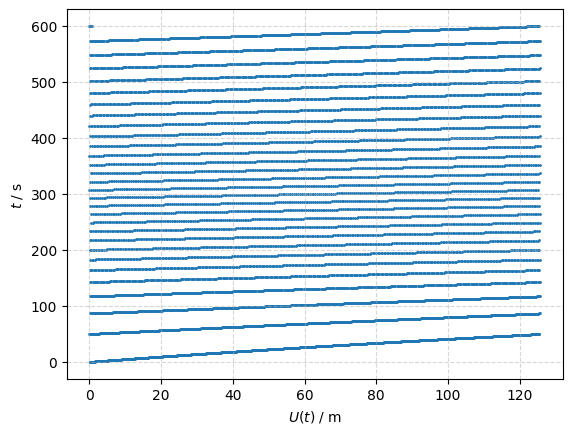

In [6]:
import numpy as np
import matplotlib.pyplot as plt
#Laden der Datei und separieren von Zeit (t) und zurückgelegter Wegstrecke ($U(t)$) 
data = np.loadtxt('periodische_daten.csv', delimiter=',').T
t = data[0] # Zeit
d = data[1] # Zurückgelegte Wegstrecke $U(t)$

plt.scatter(d, t, s=1)
plt.xlabel('$U(t)$ / m')
plt.ylabel('$t$ / s')
plt.grid(linestyle='--', alpha=0.5)
plt.show()

## Aufgabenteil B
Der Punkt bewegt sich mit einer veränderlichen Geschwindigkeit über die Kreisbahn. Berechnen Sie die Bahngeschwindigkeit $v = \frac{\Delta U}{\Delta t}$ für jeden Zeitschritt $t$ und plotten Sie die Geschwindigkeit $v$ in Abhängigkeit der Zeit $t$ über den gesamten betrachteten Zeitraum.

### Lösungsvorschlag

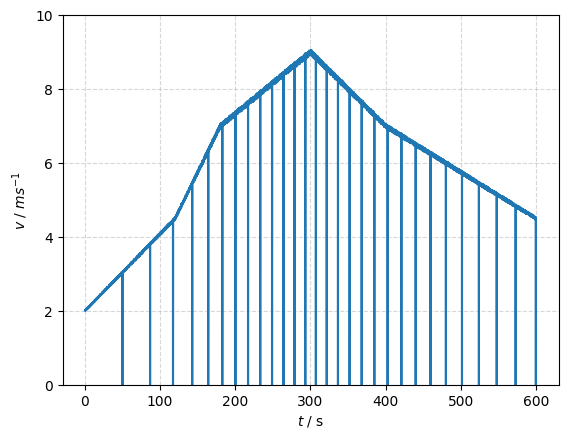

In [3]:
# Berechnen der Zeit- und Weginkremente
dt = t[1:] - t[:-1]
ds = d[1:] - d[:-1]
# Berechnen der momentanen Geschwindigkeit
v = ds / dt

plt.plot(t[1:], v)
plt.xlabel('$t$ / s')
plt.ylabel('$v~/~ms^{-1}$')
plt.grid(linestyle='--', alpha=0.5)
plt.ylim(0, 10)
plt.show()

## Aufgabenteil C
Korrigieren Sie, falls erforderlich die Geschwindigkeit um den Einfluss aus der periodischen Beschreibung des zurückgelegten Weges $U(t)$.
Tip: Plotten sie als Hilfestellung die Daten für $ds$ in Abhängigkeit von $t$.

### Lösungsvorschlag

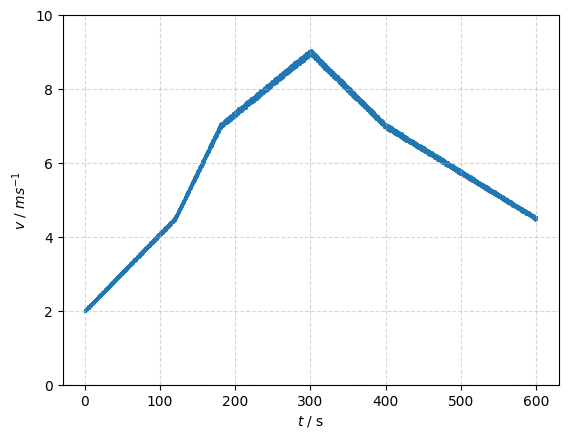

In [10]:
# Berechnen des Kreisumfangs
u = 2 * np.pi * 20

# Korrektur der Weginkremente um den periodischen Einfluss
ds_cor = np.where(ds < 0, ds+u, ds)

# Berechnen der korrigierten Geschwindigkeit
v_cor = ds_cor / dt

plt.scatter(t[1:], v_cor, 1)
plt.xlabel('$t$ / s')
plt.ylabel('$v~/~ms^{-1}$')
plt.grid(linestyle='--', alpha=0.5)
plt.ylim(0, 10)
plt.show()

## Aufgabenteil D
Berechnen Sie aus der zuvor berechneten und ggf. korrigierten Geschwindigkeit $v$ zu jedem Zeitschritt die Beschleunigung $a = \frac{\Delta v}{\Delta t}$ und plotten Sie diese in Abhängigkeit der Zeit $t$. Was fällt Ihnen auf? Wie lassen sich Berechnung bzw. Darstellung der Beschleunigung verbessern?

### Lösungsvorschlag

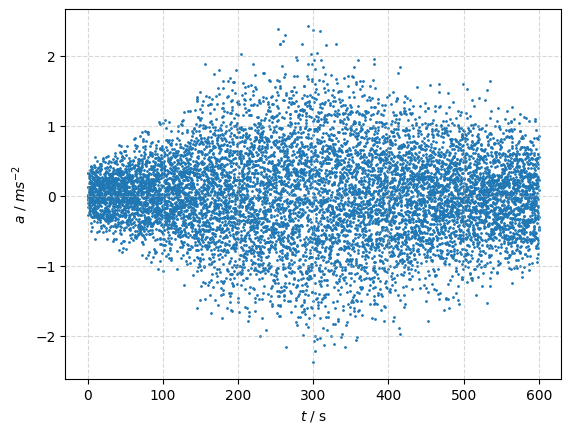

In [4]:
# Berechnen der Beschleunigung
a = (v_cor[1:] - v_cor[:-1]) / dt[1:]

plt.scatter(t[2:], a, s=1)
plt.xlabel('$t$ / s')
plt.ylabel('$a~/~ms^{-2}$')
plt.grid(linestyle='--', alpha=0.5)
plt.show()

```{toggle}
Glätten Sie die Geschwindigkeit über einen gleitenden Durschnitt (moving average bzw. MA):

$$m_{MA}^{(n)}(t) = \frac{1}{n} \sum_{i=0}^{n-1}x(t-i)$$

Erstellen Sie hierzu die Funktion moving_average, welche die Parameter x_werte, y_werte und n entgegen nimmt. Tip: Nurtzen Sie die Funktion `numpy.convolve`
```

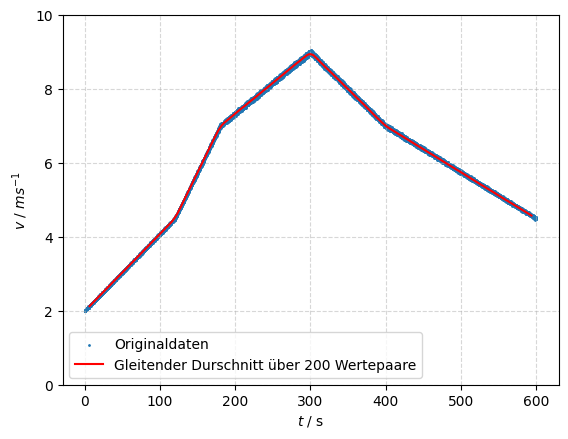

In [7]:
# Definition der Funktion 'moving_average' zur Berechnung des gleitenden Durschschnitts
def moving_average(x_werte, y_werte, n):
    window = np.ones(n)/n
    y_average = np.convolve(y_werte, window, mode='valid')
    x_average = x_werte[int((n-1)/2):-int((n)/2)] 
    return x_average, y_average

# Berechnung des gleitenden Durchschnitts der Geschwindigkeit über ein Fenster von n = 200
t_ma, v_ma = moving_average(t[1:], v_cor, 200)

plt.scatter(t[1:], v_cor, s=1, label="Originaldaten")
plt.plot(t_ma, v_ma, color='r', label="Gleitender Durschnitt über 200 Wertepaare")
plt.xlabel('$t$ / s')
plt.ylabel('$v~/~ms^{-1}$')
plt.ylim(0, 10)
plt.grid(linestyle='--', alpha=0.5)
plt.legend()
plt.show()

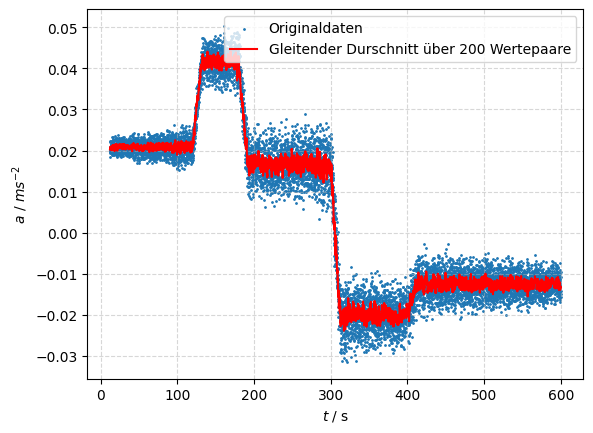

In [9]:
# Berechnung der Beschleunigung aus dem gleitenden Durchschnitt der Geschwindigkeit und den Zeitinkrementen
a = (v_ma[1:] - v_ma[:-1]) / dt[200:]
# Berechnung des gleitenden Durchschnits für die Beschelunigung
t_ma, a_ma = moving_average(t[201:], a, 10)

plt.scatter(t[201:], a, s=1, label="Originaldaten")
plt.plot(t_ma, a_ma, color='r', label="Gleitender Durschnitt über 200 Wertepaare")
plt.xlabel('$t$ / s')
plt.ylabel('$a~/~ms^{-2}$')
plt.grid(linestyle='--', alpha=0.5)
plt.legend()
plt.show()